<a href="https://colab.research.google.com/github/Victoras2007/PlayerGoalPrediction/blob/main/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import pandas as pd
import kagglehub
import csv
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# uploading dataset for players

df = pd.read_csv('/content/database.csv')

In [27]:
# uploding dataset for goalkeepers

dfg = pd.read_csv('/content/book3.csv')

In [28]:
df

Player               Team   # Nation Position     Age  \
0        Bruno Fernandes  Manchester United   8    POR    FW,AM  29-343   
1        Marcus Rashford  Manchester United  10    ENG       LW  26-290   
2            Amad Diallo  Manchester United  16    CIV       RW  22-036   
3     Alejandro Garnacho  Manchester United  17    ARG       RW  20-046   
4            Mason Mount  Manchester United   7    ENG       AM  25-219   
...                  ...                ...  ..    ...      ...     ...   
4265          Ben Davies  Tottenham Hotspur  33    WAL       CB  31-225   
4266         Pedro Porro  Tottenham Hotspur  23    ESP       RB  25-083   
4267       Radu Drăgușin  Tottenham Hotspur   6    ROU       CB  22-306   
4268         Archie Gray  Tottenham Hotspur  14    ENG    RB,CB  18-268   
4269      Fraser Forster  Tottenham Hotspur  20    ENG       GK  36-263   

      Minutes  Goals  Assists  Penalty Shoot on Goal  ...  \
0          90      0        0                      0  ...   
1          90      0        0                      0  ...   
2          60      0        0                      0  ...   
3          30      0        1                      0  ...   
4          60      0        0                      0  ...   
...       ...    ...      ...                    ...  ...   
4265       61      0        0                      0  ...   
4266       29      0        0                      0  ...   
4267       90      0        0                      0  ...   
4268       90      0        0                      0  ...   
4269       90      0        0                      0  ...   

      Goal-Creating Actions  Passes Completed  Passes Attempted  \
0                         0                43                60   
1                         0                22                30   
2                         0                28                33   
3                         1                10                11   
4                         0                11                15   
...                     ...               ...               ...   
4265                      0                30                33   
4266                      0                11                17   
4267                      0                48                60   
4268                      0                45                57   
4269                      0                29                32   

      Pass Completion %  Progressive Passes  Carries  Progressive Carries  \
0                  71,7                   6       50                    7   
1                  73,3                   2       34                    2   
2                  84,8                   1       22                    0   
3                  90,9                   0       11                    2   
4                  73,3                   1       16                    0   
...                 ...                 ...      ...                  ...   
4265               90,9                   4       27                    1   
4266               64,7                   0       11                    0   
4267               80,0                   5       46                    0   
4268               78,9                   3       40                    1   
4269               90,6                   0       13                    0   

      Dribble Attempts  Successful Dribbles        Date  
0                    1                    1  2024-08-16  
1                    6                    0  2024-08-16  
2                    1                    1  2024-08-16  
3                    2                    0  2024-08-16  
4                    2                    0  2024-08-16  
...                ...                  ...         ...  
4265                 0                    0  2024-12-05  
4266                 0                    0  2024-12-05  
4267                 0                    0  2024-12-05  
4268                 3                    2  2024-12-05  
4269            

In [29]:
dfg

Rk                   Player   Nation Position             Team  GA  Saves  \
0    1                  Alisson   br BRA       GK        Liverpool  10     20   
1    2          Alphonse Areola   fr FRA       GK         West Ham  23     33   
2    3        Kepa Arrizabalaga   es ESP       GK      Bournemouth  18     50   
3    4           Brandon Austin  eng ENG       GK        Tottenham   2      2   
4    5          Martin Dúbravka   sk SVK       GK    Newcastle Utd   1      7   
5    6                  Ederson   br BRA       GK  Manchester City  19     28   
6    7         Łukasz Fabiański   pl POL       GK         West Ham  16     40   
7    8             Mark Flekken   nl NED       GK        Brentford  35     87   
8    9           Fraser Forster  eng ENG       GK        Tottenham  15     27   
9   10           Dean Henderson  eng ENG       GK   Crystal Palace  28     55   
10  11           Mads Hermansen   dk DEN       GK   Leicester City  31     64   
11  12          Vitezslav Jaros   cz CZE       GK        Liverpool   0      1   
12  13            Sam Johnstone  eng ENG       GK           Wolves  17     23   
13  14          Filip Jørgensen   dk DEN       GK          Chelsea   3      7   
14  15        Caoimhín Kelleher   ie IRL       GK        Liverpool   9     21   
15  16               Bernd Leno   de GER       GK           Fulham  27     58   
16  17               Joe Lumley  eng ENG       GK      Southampton   7     13   
17  18        Emiliano Martínez   ar ARG       GK      Aston Villa  31     48   
18  19            Alex McCarthy  eng ENG       GK      Southampton  10     19   
19  20           Arijanet Muric   xk KVX       GK     Ipswich Town  31     65   
20  21                     Neto   br BRA       GK      Bournemouth   2     11   
21  22              Robin Olsen   se SWE       GK      Aston Villa   1      2   
22  23              André Onana   cm CMR       GK   Manchester Utd  28     50   
23  24            Stefan Ortega   de GER       GK  Manchester City   8     21   
24  25          Jordan Pickford  eng ENG       GK          Everton  25     58   
25  26                Nick Pope  eng ENG       GK    Newcastle Utd  21     53   
26  27  Hákon Rafn Valdimarsson   is ISL       GK        Brentford   0      2   
27  28           Aaron Ramsdale  eng ENG       GK      Southampton  27     54   
28  29               David Raya   es ESP       GK          Arsenal  18     49   
29  30                  José Sá   pt POR       GK           Wolves  28     35   
30  31           Robert Sánchez   es ESP       GK          Chelsea  21     62   
31  32                Matz Sels   be BEL       GK  Nott'ham Forest  19     58   
32  33             Jason Steele  eng ENG       GK         Brighton   1      3   
33  34         Jakub Stolarczyk   pl POL       GK   Leicester City   7     10   
34  35             Mark Travers   ie IRL       GK      Bournemouth   3     12   
35  36          Bart Verbruggen   nl NED       GK         Brighton  28     51   
36  37        Guglielmo Vicario   it ITA       GK        Tottenham  13     28   
37  38         Christian Walton  eng ENG       GK     Ipswich Town   4      9   
38  39               Danny Ward  wls WAL       GK   Leicester City   6      4   

    Save%  PKsv  PKsv%  
0    66.7     0    NaN  
1    57.4     0    NaN  
2    75.0     0    0.0  
3    50.0     0    NaN  
4    87.5     0    NaN  
5    63.0     0    0.0  
6    75.0     0    0.0  
7    71.9     0    0.0  
8    69.0     0    0.0  
9    65.9     1  100.0  
10   67.7     0    0.0  
11  100.0     0    NaN  
12   61.5     0    0.0  
13   80.0     0    0.0  
14   71.0     1  100.0  
15   69.0     0    0.0  
16   65.0     0    NaN  
17   62.5     1   50.0  
18   69.0     0    0.0  
19   70.8     0    0.0  
20   84.6     0    NaN  
21   66.7     0    NaN  
22   68.4     1   25.0  
23   75.9     0    0.0  
24   70.6     2  100.0  
25   71.2     0    NaN  
26  100.0     0    NaN  
27   69.1     0    0.0  
28   76.1     0    0.0  
29   59.7    

In [30]:
# dropping columns not needed for our program

df.drop(columns=['#','Age','Date','Assists','Non-Penalty xG (npxG)' , 'Penalty Shoot','Yellow Cards', 'Red Cards', 'Touches', 'Dribbles', 'Tackles', 'Blocks', 'Expected Assists (xAG)', 'Shot-Creating Actions', 'Passes Completed', 'Passes Attempted', 'Pass Completion %', 'Progressive Passes', 'Carries', 'Progressive Carries', 'Dribble Attempts', 'Goal-Creating Actions','Successful Dribbles'], inplace=True)

In [31]:
df.isnull().sum()   # no missing values in df

Player                   0
Team                     0
Nation                   0
Position                 0
Minutes                  0
Goals                    0
Penalty Shoot on Goal    0
Total Shoot              0
Shoot on Target          0
Expected Goals (xG)      0
dtype: int64

In [32]:
dfg.isnull().sum()  # cheking for missing values

Rk           0
Player       0
Nation       0
Position     0
Team         0
GA           0
Saves        0
Save%        0
PKsv         0
PKsv%       15
dtype: int64

In [33]:
dfg.isnull().sum() / len(df) * 100  # checking percentage of missing values

Rk          0.000000
Player      0.000000
Nation      0.000000
Position    0.000000
Team        0.000000
GA          0.000000
Saves       0.000000
Save%       0.000000
PKsv        0.000000
PKsv%       0.351288
dtype: float64

In [34]:
# since 35% of the data in the last row is missing we will drop it
dfg.dropna(axis='columns')

Rk                   Player   Nation Position             Team  GA  Saves  \
0    1                  Alisson   br BRA       GK        Liverpool  10     20   
1    2          Alphonse Areola   fr FRA       GK         West Ham  23     33   
2    3        Kepa Arrizabalaga   es ESP       GK      Bournemouth  18     50   
3    4           Brandon Austin  eng ENG       GK        Tottenham   2      2   
4    5          Martin Dúbravka   sk SVK       GK    Newcastle Utd   1      7   
5    6                  Ederson   br BRA       GK  Manchester City  19     28   
6    7         Łukasz Fabiański   pl POL       GK         West Ham  16     40   
7    8             Mark Flekken   nl NED       GK        Brentford  35     87   
8    9           Fraser Forster  eng ENG       GK        Tottenham  15     27   
9   10           Dean Henderson  eng ENG       GK   Crystal Palace  28     55   
10  11           Mads Hermansen   dk DEN       GK   Leicester City  31     64   
11  12          Vitezslav Jaros   cz CZE       GK        Liverpool   0      1   
12  13            Sam Johnstone  eng ENG       GK           Wolves  17     23   
13  14          Filip Jørgensen   dk DEN       GK          Chelsea   3      7   
14  15        Caoimhín Kelleher   ie IRL       GK        Liverpool   9     21   
15  16               Bernd Leno   de GER       GK           Fulham  27     58   
16  17               Joe Lumley  eng ENG       GK      Southampton   7     13   
17  18        Emiliano Martínez   ar ARG       GK      Aston Villa  31     48   
18  19            Alex McCarthy  eng ENG       GK      Southampton  10     19   
19  20           Arijanet Muric   xk KVX       GK     Ipswich Town  31     65   
20  21                     Neto   br BRA       GK      Bournemouth   2     11   
21  22              Robin Olsen   se SWE       GK      Aston Villa   1      2   
22  23              André Onana   cm CMR       GK   Manchester Utd  28     50   
23  24            Stefan Ortega   de GER       GK  Manchester City   8     21   
24  25          Jordan Pickford  eng ENG       GK          Everton  25     58   
25  26                Nick Pope  eng ENG       GK    Newcastle Utd  21     53   
26  27  Hákon Rafn Valdimarsson   is ISL       GK        Brentford   0      2   
27  28           Aaron Ramsdale  eng ENG       GK      Southampton  27     54   
28  29               David Raya   es ESP       GK          Arsenal  18     49   
29  30                  José Sá   pt POR       GK           Wolves  28     35   
30  31           Robert Sánchez   es ESP       GK          Chelsea  21     62   
31  32                Matz Sels   be BEL       GK  Nott'ham Forest  19     58   
32  33             Jason Steele  eng ENG       GK         Brighton   1      3   
33  34         Jakub Stolarczyk   pl POL       GK   Leicester City   7     10   
34  35             Mark Travers   ie IRL       GK      Bournemouth   3     12   
35  36          Bart Verbruggen   nl NED       GK         Brighton  28     51   
36  37        Guglielmo Vicario   it ITA       GK        Tottenham  13     28   
37  38         Christian Walton  eng ENG       GK     Ipswich Town   4      9   
38  39               Danny Ward  wls WAL       GK   Leicester City   6      4   

    Save%  PKsv  
0    66.7     0  
1    57.4     0  
2    75.0     0  
3    50.0     0  
4    87.5     0  
5    63.0     0  
6    75.0     0  
7    71.9     0  
8    69.0     0  
9    65.9     1  
10   67.7     0  
11  100.0     0  
12   61.5     0  
13   80.0     0  
14   71.0     1  
15   69.0     0  
16   65.0     0  
17   62.5     1  
18   69.0     0  
19   70.8     0  
20   84.6     0  
21   66.7     0  
22   68.4     1  
23   75.9     0  
24   70.6     2  
25   71.2     0  
26  100.0     0  
27   69.1     0  
28   76.1     0  
29   59.7     1  
30   78.6     1  
31   76.6     0  
32   75.0     0  
33   58.8     0  
34   80.0     0  
35   67.9     0  
36   68.3     0  
37   84.6     0  
38   40.0     0

In [35]:
# view the new dataframe

df

Player               Team Nation Position  Minutes  Goals  \
0        Bruno Fernandes  Manchester United    POR    FW,AM       90      0   
1        Marcus Rashford  Manchester United    ENG       LW       90      0   
2            Amad Diallo  Manchester United    CIV       RW       60      0   
3     Alejandro Garnacho  Manchester United    ARG       RW       30      0   
4            Mason Mount  Manchester United    ENG       AM       60      0   
...                  ...                ...    ...      ...      ...    ...   
4265          Ben Davies  Tottenham Hotspur    WAL       CB       61      0   
4266         Pedro Porro  Tottenham Hotspur    ESP       RB       29      0   
4267       Radu Drăgușin  Tottenham Hotspur    ROU       CB       90      0   
4268         Archie Gray  Tottenham Hotspur    ENG    RB,CB       90      0   
4269      Fraser Forster  Tottenham Hotspur    ENG       GK       90      0   

      Penalty Shoot on Goal  Total Shoot  Shoot on Target  Expected Goals (xG)  
0                         0            6                3                  1.2  
1                         0            0                0                  0.0  
2                         0            0                0                  0.0  
3                         0            2                0                  0.7  
4                         0            1                1                  0.3  
...                     ...          ...              ...                  ...  
4265                      0            0                0                  0.0  
4266                      0            1                1                  0.1  
4267                      0            0                0                  0.0  
4268                      0            1                1                  0.0  
4269                      0            0                0                  0.0  

[4270 rows x 10 columns]

In [36]:
# view the new dataframe

dfg

Rk                   Player   Nation Position             Team  GA  Saves  \
0    1                  Alisson   br BRA       GK        Liverpool  10     20   
1    2          Alphonse Areola   fr FRA       GK         West Ham  23     33   
2    3        Kepa Arrizabalaga   es ESP       GK      Bournemouth  18     50   
3    4           Brandon Austin  eng ENG       GK        Tottenham   2      2   
4    5          Martin Dúbravka   sk SVK       GK    Newcastle Utd   1      7   
5    6                  Ederson   br BRA       GK  Manchester City  19     28   
6    7         Łukasz Fabiański   pl POL       GK         West Ham  16     40   
7    8             Mark Flekken   nl NED       GK        Brentford  35     87   
8    9           Fraser Forster  eng ENG       GK        Tottenham  15     27   
9   10           Dean Henderson  eng ENG       GK   Crystal Palace  28     55   
10  11           Mads Hermansen   dk DEN       GK   Leicester City  31     64   
11  12          Vitezslav Jaros   cz CZE       GK        Liverpool   0      1   
12  13            Sam Johnstone  eng ENG       GK           Wolves  17     23   
13  14          Filip Jørgensen   dk DEN       GK          Chelsea   3      7   
14  15        Caoimhín Kelleher   ie IRL       GK        Liverpool   9     21   
15  16               Bernd Leno   de GER       GK           Fulham  27     58   
16  17               Joe Lumley  eng ENG       GK      Southampton   7     13   
17  18        Emiliano Martínez   ar ARG       GK      Aston Villa  31     48   
18  19            Alex McCarthy  eng ENG       GK      Southampton  10     19   
19  20           Arijanet Muric   xk KVX       GK     Ipswich Town  31     65   
20  21                     Neto   br BRA       GK      Bournemouth   2     11   
21  22              Robin Olsen   se SWE       GK      Aston Villa   1      2   
22  23              André Onana   cm CMR       GK   Manchester Utd  28     50   
23  24            Stefan Ortega   de GER       GK  Manchester City   8     21   
24  25          Jordan Pickford  eng ENG       GK          Everton  25     58   
25  26                Nick Pope  eng ENG       GK    Newcastle Utd  21     53   
26  27  Hákon Rafn Valdimarsson   is ISL       GK        Brentford   0      2   
27  28           Aaron Ramsdale  eng ENG       GK      Southampton  27     54   
28  29               David Raya   es ESP       GK          Arsenal  18     49   
29  30                  José Sá   pt POR       GK           Wolves  28     35   
30  31           Robert Sánchez   es ESP       GK          Chelsea  21     62   
31  32                Matz Sels   be BEL       GK  Nott'ham Forest  19     58   
32  33             Jason Steele  eng ENG       GK         Brighton   1      3   
33  34         Jakub Stolarczyk   pl POL       GK   Leicester City   7     10   
34  35             Mark Travers   ie IRL       GK      Bournemouth   3     12   
35  36          Bart Verbruggen   nl NED       GK         Brighton  28     51   
36  37        Guglielmo Vicario   it ITA       GK        Tottenham  13     28   
37  38         Christian Walton  eng ENG       GK     Ipswich Town   4      9   
38  39               Danny Ward  wls WAL       GK   Leicester City   6      4   

    Save%  PKsv  PKsv%  
0    66.7     0    NaN  
1    57.4     0    NaN  
2    75.0     0    0.0  
3    50.0     0    NaN  
4    87.5     0    NaN  
5    63.0     0    0.0  
6    75.0     0    0.0  
7    71.9     0    0.0  
8    69.0     0    0.0  
9    65.9     1  100.0  
10   67.7     0    0.0  
11  100.0     0    NaN  
12   61.5     0    0.0  
13   80.0     0    0.0  
14   71.0     1  100.0  
15   69.0     0    0.0  
16   65.0     0    NaN  
17   62.5     1   50.0  
18   69.0     0    0.0  
19   70.8     0    0.0  
20   84.6     0    NaN  
21   66.7     0    NaN  
22   68.4     1   25.0  
23   75.9     0    0.0  
24   70.6     2  100.0  
25   71.2     0    NaN  
26  100.0     0    NaN  
27   69.1     0    0.0  
28   76.1     0    0.0  
29   59.7    

In [37]:
# visualising data using histograms for both DataFrames

In [38]:
plt.figure(figsize=(100,100))
sns.histplot(x=df['Minutes'], bins=40, kde=True)
plt.xticks(fontsize=70)
plt.yticks(fontsize=70)
plt.title('Average Minutes Played by each Player', fontsize=120)
plt.xlabel('Minutes Played per 90mins', fontsize=80)
plt.ylabel('Frequency', fontsize=80)
plt.grid()
plt.show()

In [39]:
plt.figure(figsize=(100,100))
sns.histplot(x=df['Penalty Shoot on Goal'], bins=40, kde=True)
plt.xticks(fontsize=70)
plt.yticks(fontsize=70)
plt.title('Average Penalty Shoots on Goal by each Player', fontsize=120)
plt.xlabel('Penalty Shoot on Goal per Match', fontsize=80)
plt.ylabel('Frequency', fontsize=80)
plt.grid()
plt.show()

In [40]:
plt.figure(figsize=(100,100))
sns.histplot(x=df['Total Shoot'], bins=40, kde=True)
plt.xticks(fontsize=70)
plt.yticks(fontsize=70)
plt.title('Average Total Shoots by each Player', fontsize=120)
plt.xlabel('Total Shoots per Match', fontsize=80)
plt.ylabel('Frequuency', fontsize=80)
plt.grid()
plt.show()

In [41]:
plt.figure(figsize=(100,100))
sns.histplot(x=df['Shoot on Target'], bins=40, kde=True)
plt.xticks(fontsize=70)
plt.yticks(fontsize=70)
plt.title('Average Shoots on Target by each Player', fontsize=120)
plt.xlabel('Total Shoot on Target per Match', fontsize=80)
plt.ylabel('Frequency', fontsize=80)
plt.grid()
plt.show()

In [42]:
plt.figure(figsize=(100,100))
sns.histplot(x=df['Expected Goals (xG)'], bins=40, kde=True)
plt.xticks(fontsize=70)
plt.yticks(fontsize=70)
plt.title('Expected Goals by each Player', fontsize=120)
plt.xlabel('Expected Goals (xG) per Match', fontsize=80)
plt.ylabel('Frequency', fontsize=80)
plt.grid()
plt.show()

In [43]:
plt.figure(figsize=(100,100))
sns.histplot(x=dfg['GA'], bins=40, kde=True)
plt.xticks(fontsize=70)
plt.yticks(fontsize=70)
plt.title('Goals Scored Against Each Goalkeeper', fontsize=120)
plt.xlabel('Number of Goals Against', fontsize=80)
plt.ylabel('Frequency', fontsize=80)
plt.grid()
plt.show()

In [44]:
plt.figure(figsize=(100,100))
sns.histplot(x=dfg['Saves'], bins=40, kde=True)
plt.xticks(fontsize=70)
plt.yticks(fontsize=70)
plt.title('Goalkeeper Saves', fontsize=120)
plt.xlabel('Number of Goalkeeper Saves', fontsize=80)
plt.ylabel('Frequency', fontsize=80)
plt.grid()
plt.show()

In [45]:
plt.figure(figsize=(100,100))
sns.histplot(x=dfg['Save%'], bins=40, kde=True)
plt.xticks(fontsize=70)
plt.yticks(fontsize=70)
plt.title('Goalkeeper Saves Percentage', fontsize=120)
plt.xlabel('Percentage of Goalkeeper Saves', fontsize=80)
plt.ylabel('Frequency', fontsize=80)
plt.grid()
plt.show()

In [46]:
plt.figure(figsize=(100,100))
sns.histplot(x=dfg['PKsv'], bins=40, kde=True)
plt.xticks(fontsize=70)
plt.yticks(fontsize=70)
plt.title('Penalty Kicks Saved', fontsize=120)
plt.xlabel('Number of Penalty Kicks Saved', fontsize=80)
plt.ylabel('Frequency', fontsize=80)
plt.grid()
plt.show()

In [47]:
plt.figure(figsize=(100,100))
sns.histplot(x=dfg['PKsv%'], bins=40, kde=True)
plt.xticks(fontsize=70)
plt.yticks(fontsize=70)
plt.title('Penalty Kicks Saved Percentage', fontsize=120)
plt.xlabel('Percentage of Penalty Kicks Saved', fontsize=80)
plt.ylabel('Frequency', fontsize=80)
plt.grid()
plt.show()

In [ ]:
#visualizing the correlation between all the data in the dataframe using correlation matrix

In [51]:
df_new = df.drop(columns=['Player', 'Team', 'Nation', 'Position'])

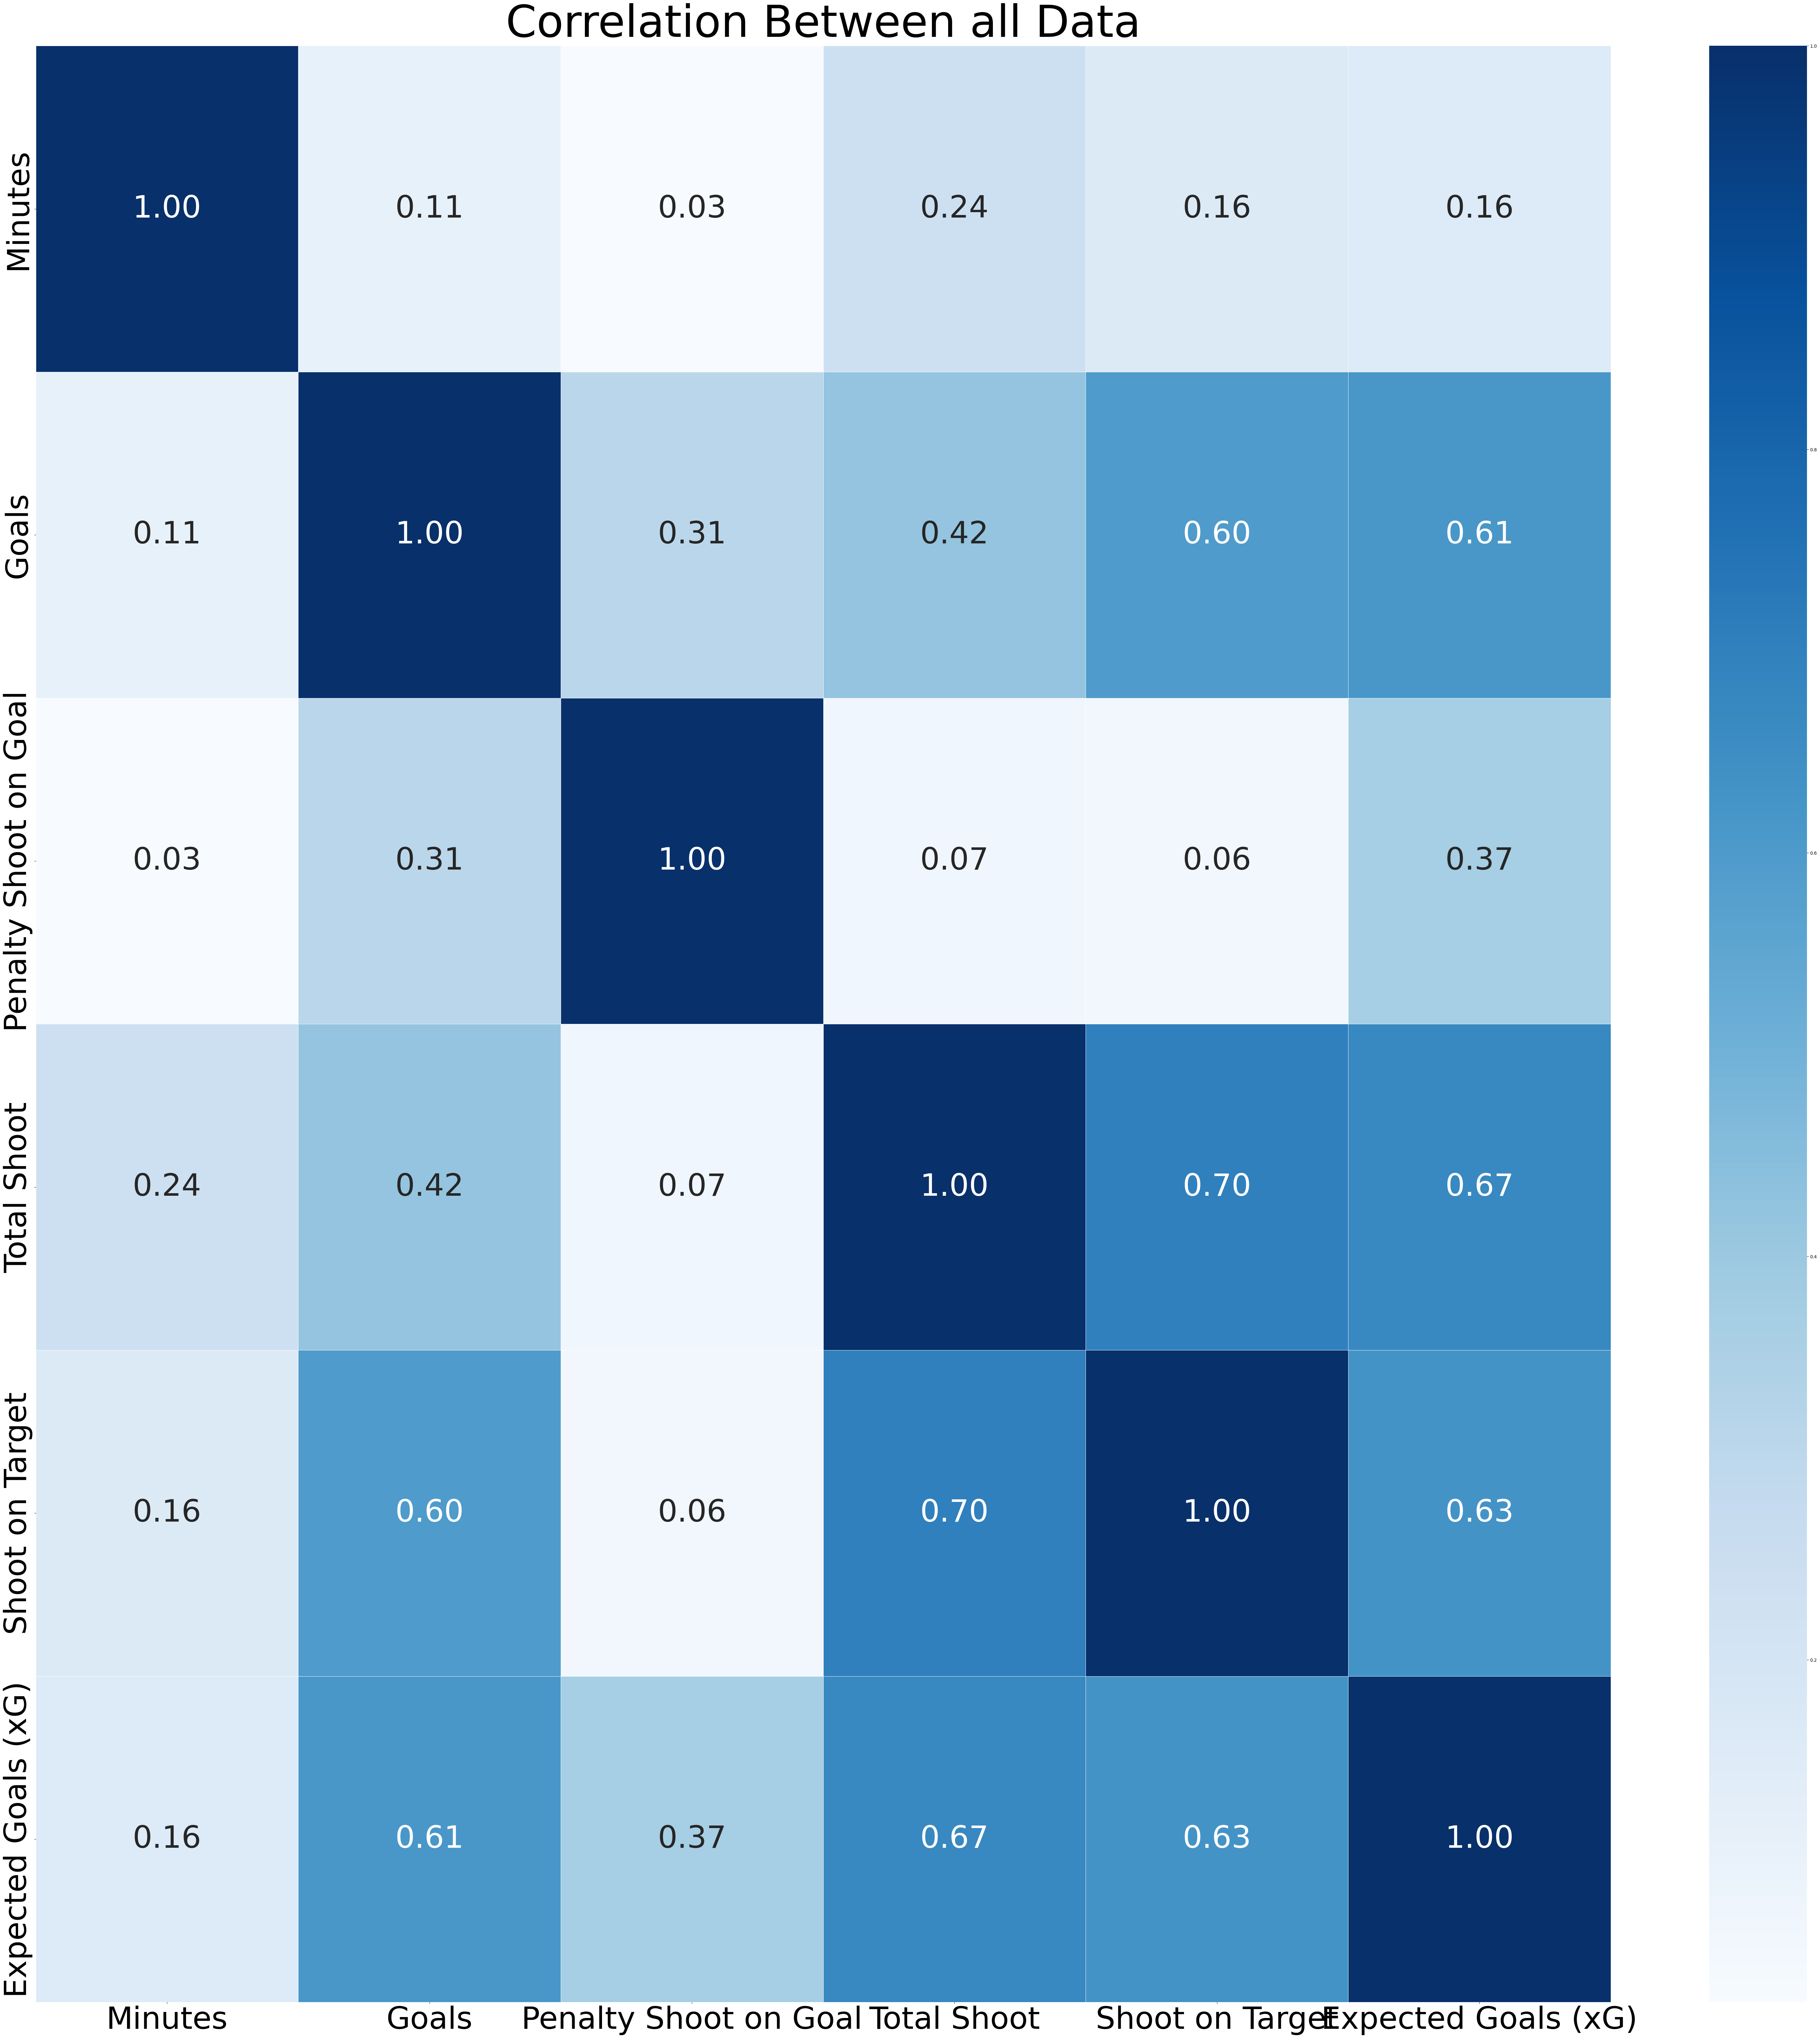

In [62]:
plt.figure(figsize=(80,80))
corr_matrix = df_new.corr()
sns.heatmap(corr_matrix, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5,annot_kws={"size": 70})
plt.title("Correlation Between all Data", fontsize=100)
plt.xticks(fontsize=70)
plt.yticks(fontsize=70)
plt.show()